# Image Classification using Logistic Regression and Softmax Regression
### Fashion-MNIST Dataset

## 1. Install Required Libraries
Before starting, you need to install the necessary Python libraries:
- **TensorFlow**: Used for building and training the Softmax Regression model.
- **Scikit-Learn**: Provides the Logistic Regression implementation.
- **Matplotlib**: Used for plotting images and confusion matrices.
```bash
pip install tensorflow scikit-learn matplotlib
```


In [1]:
pip install tensorflow scikit-learn matplotlib


## 2. Import Necessary Libraries
In this step, we import the necessary libraries to handle data processing, model training, and evaluation.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical


## 3. Load and Preprocess the Fashion-MNIST Dataset
Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training images and 10,000 test images, categorized into 10 classes.


In [3]:
# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten images for Logistic Regression


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


\## 4. Logistic Regression for Image Classification
Logistic Regression is used for multi-class classification. We fit the model using the flattened images.

In [9]:


# Flatten images for Logistic Regression
train_images_flattened = train_images.reshape(train_images.shape[0], -1) # Reshape to 2D array
test_images_flattened = test_images.reshape(test_images.shape[0], -1)   # Reshape to 2D array

model = LogisticRegression(max_iter=10000, solver='lbfgs', multi_class='auto')

# Train the model on the training data
model.fit(train_images_flattened, train_labels)  # Use the flattened images

# Predict on the test data
y_pred = model.predict(test_images_flattened)  # Use the flattened images

# Evaluate the model's performance
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 84.41%


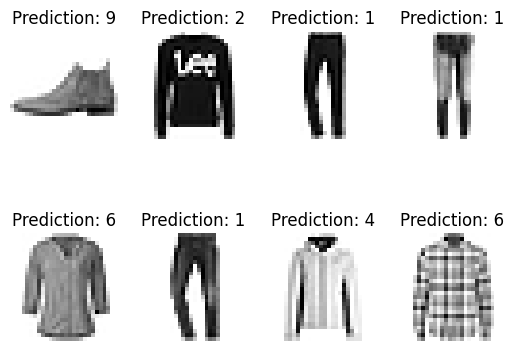

In [10]:
fig, axes = plt.subplots(2, 4)
images_and_predictions = list(zip(test_images, y_pred))
for ax, (image, prediction) in zip(axes.flat, images_and_predictions): # Iterate over flattened axes
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f'Prediction: {prediction}')

plt.show()

## 5. Softmax Regression (Using TensorFlow/Keras)
Softmax Regression is implemented using a simple neural network in TensorFlow/Keras.

In [22]:
model = models.Sequential()

# Flatten the input images before passing them to the dense layer
model.add(layers.Flatten(input_shape=(28, 28)))

# Add a dense layer with softmax activation
model.add(layers.Dense(10, activation='softmax'))
model.add(layers.Dense(10, activation='softmax'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,070 (31.52 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3724 - loss: 2.0310 - val_accuracy: 0.4877 - val_loss: 1.2483
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4856 - loss: 1.1745 - val_accuracy: 0.4969 - val_loss: 1.0578
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5000 - loss: 1.0294 - val_accuracy: 0.5461 - val_loss: 0.9917
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5540 - loss: 0.9528 - val_accuracy: 0.5610 - val_loss: 0.9206
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5704 - loss: 0.8875 - val_accuracy: 0.5670 - val_loss: 0.8915
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5885 - loss: 0.8471 - val_accuracy: 0.6225 - val_loss: 0.8367
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6576 - loss: 0.7696 - val_accuracy: 0.6718 - val_loss: 0.7164
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7014 - loss: 0.6752 - 

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8088 - loss: 0.5454
Test accuracy: 80.43%


## 6. Visualize Model Predictions
We visualize the predictions made by the Softmax Regression model on the test dataset.

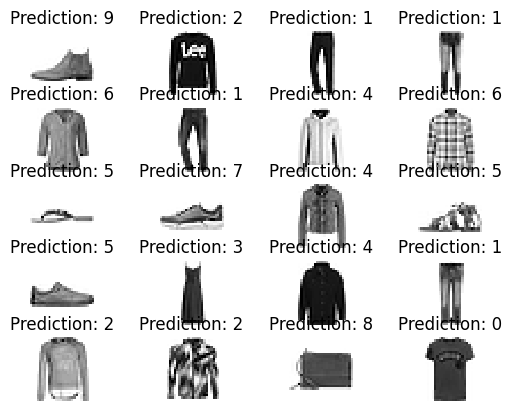

In [27]:
fig, axes = plt.subplots(5, 4)
images_and_predictions = list(zip(test_images, y_pred))
for ax, (image, prediction) in zip(axes.flat, images_and_predictions): # Iterate over flattened axes
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f'Prediction: {prediction}')

plt.show()

### Summary
- **Logistic Regression**: You flattened the images and used `LogisticRegression` from Scikit-Learn to classify the Fashion-MNIST dataset.
- **Softmax Regression**: You used TensorFlow/Keras to build a simple neural network with a softmax activation function to classify the same dataset.